## Final Project Submission

Please fill out:
* Student name: Jaklyn Soler
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Rafael Carrasco
* Blog post URL:

# Strategic Approach

The stakeholder, SyriaTel, is a telecommunications company whose goal is to better understand what factors are causing customer churn. Due to limits on data size, the model will only be robust enough to be used by SyriaTel to analyze their specific data provided.

By exploring typical customer churn and using the CRISP-DM framework, I will seek to answer the following questions: 

1. What features of the dataset are primary determinants of customer churn and to what extent?

2. What are the ways that these findings can be interpreted and how can SyriaTel implement cost-effective solutions?

3. Will these solutions be feasible in reducing the customer churn rate by at least 7%?

# Introduction 

### The Problem

The problem put forth by SyriaTel is that they have a customer churn rate in their dataset of nearly 14.5%. An acceptable churn rate is 5-7% annually. Therefore, the true problem to solve with this dataset is to understand the features affecting customer churn, and to what degree. This will empower SyriaTel with the knowledge to lower customer churn by at least 7%.

This is a binary classification problem. 

The reason that customer churn matters is because it is more expensive to find new customers than to retain current customers. Therefore, when considering solutions for this problem, expenses of solutions should be considered. 

### Customer Experience

SyriaTel is a phone provider. Understanding the pain points of the customer experience is essential. Some of the factors that SyriaTel should take into consideration as they approach the findings of the data are:
 - Monthly Costs
 - Costs of Contract Cancellation
 - Costs of Contract Initiation
 - Unexpected Charges (Potentially from International Calls without an International Plan)
 - SyriaTel Costs v. Competition Costs by Region
 - Network Strength
 - Difficulty of Troubleshooting
 - Any Customer Interaction Via Employees or Ads

# Import Data and Relevant Packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools
from imblearn.over_sampling import SMOTE, ADASYN
import imblearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, auc, confusion_matrix, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.datasets import make_blobs, make_moons
from sklearn.svm import SVC
from numpy import loadtxt

In [2]:
df = pd.read_csv('data/Kaggle_Customer_Churn_Dataset.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Churners versus Non-Churners

In [3]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

### Reducing Customer Churn

Existing strategies for customer churn includes: 
 - Analyzing Cause of Churn
 - Engaging with Customers (Relationship Marketing)
 - Customer Education (Training)
 - Identify Customer Risk Factors
 - Define Most Valuable Customers
     - Segment Customers: Customers can be segmented into groups of profitablity, readiness to leave, and their likelihood to positively respond to your offer to stay. This way you can better predict. 
     
- Offer Incentives: Regarded as the most effective
- Targeting Correct Audience
- Providing Better Service
- Understanding Complaints and Solving at the Source: 96% of unhappy customers don't complain. 91% of those customers just leave and dont come back. 
- Use your best Sales People on Retention
- Flaunt Competitive Advantages
- Offer Long Term Contracts

# Data Understanding

The data has been provided by Kaggle. Details on the units for the account length feature can be pulled from other sources. 

The target will be the churn feature. Other features may be added to the df to better predict churn. 

There is enough data to build a model for SyriaTel to analyze their customer churn at this specific point in time. However, more data would be needed for a more robust model. 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

# Data Preparation

### Viewing the Data

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Viewing Value Counts for Churn

In [6]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Inspecting the Data for NaN Values

In [7]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Observing Column Titles

In [8]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Renaming Column Titles to Remove Spaces

In [9]:
df.rename(columns={'account length':'account_length', 'area code': 'area_code', 'phone number': 'phone_number', 'international plan': 'intl_plan', 'voice mail plan': 'vmail_plan', 'number vmail messages': 'qty_vmails', 'total day minutes':'sum_day_mins','total day calls':'sum_day_calls', 'total day charge':'total_day_charge', 'total eve minutes':'sum_eve_mins', 'total eve calls': 'sum_eve_calls', 'total eve charge': 'total_eve_charge', 'total night minutes':'sum_night_mins', 'total night calls':'sum_night_calls', 'total night charge': 'total_night_charge', 'total intl minutes':'sum_intl_mins', 'total intl calls': 'sum_intl_calls', 'total intl charge': 'total_intl_charge', 'customer service calls': 'cust_serv_calls'}, inplace = True)

### Inspecting New Column Titles

In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'vmail_plan', 'qty_vmails', 'sum_day_mins', 'sum_day_calls',
       'total_day_charge', 'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge',
       'sum_night_mins', 'sum_night_calls', 'total_night_charge',
       'sum_intl_mins', 'sum_intl_calls', 'total_intl_charge',
       'cust_serv_calls', 'churn'],
      dtype='object')

### Inspecting Column Atributes

In [11]:
df.describe()

,account_length,area_code,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,total_eve_charge,sum_night_mins,sum_night_calls,total_night_charge,sum_intl_mins,sum_intl_calls,total_intl_charge,cust_serv_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Looking at Value Counts for Voicemail

In [12]:
df.qty_vmails.value_counts().sort_index()

0     2411
4        1
8        2
9        2
10       1
11       2
12       6
13       4
14       7
15       9
16      13
17      14
18       7
19      19
20      22
21      28
22      32
23      36
24      42
25      37
26      41
27      44
28      51
29      53
30      44
31      60
32      41
33      46
34      29
35      32
36      34
37      29
38      25
39      30
40      16
41      13
42      15
43       9
44       7
45       6
46       4
47       3
48       2
49       1
50       2
51       1
Name: qty_vmails, dtype: int64

### Looking at Value Counts for Account Length

One can assume that the account length is in terms of months. Ultimately this would need to be confirmed with the company.

In [13]:
df.account_length.value_counts().sort_index()

1      8
2      1
3      5
4      1
5      1
      ..
221    1
224    2
225    2
232    1
243    1
Name: account_length, Length: 212, dtype: int64

In [14]:
df.account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [15]:
df.area_code.value_counts()

415    1655
510     840
408     838
Name: area_code, dtype: int64

In [16]:
df.intl_plan.value_counts()

no     3010
yes     323
Name: intl_plan, dtype: int64

### Dropping the Phone Number Feature

In [17]:
df.drop(columns='phone_number', inplace = True)

### Replace False and No with Zero

In [18]:
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)

### Replace True and Yes with One

In [19]:
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

### Dummify the States & Drop the First Row


In [20]:
df.columns

Index(['state', 'account_length', 'area_code', 'intl_plan', 'vmail_plan',
       'qty_vmails', 'sum_day_mins', 'sum_day_calls', 'total_day_charge',
       'sum_eve_mins', 'sum_eve_calls', 'total_eve_charge', 'sum_night_mins',
       'sum_night_calls', 'total_night_charge', 'sum_intl_mins',
       'sum_intl_calls', 'total_intl_charge', 'cust_serv_calls', 'churn'],
      dtype='object')

In [21]:
one_hot_df = pd.get_dummies(df, drop_first = True)
one_hot_df.head()

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

### Monthly Charge

The new feature 'monthly_charge is the sum of the monthly charges.

In [22]:
df['monthly_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'])

In [23]:
df.monthly_charge.describe()

count    3333.000000
mean       59.449754
std        10.502261
min        22.930000
25%        52.380000
50%        59.470000
75%        66.480000
max        96.150000
Name: monthly_charge, dtype: float64

### Total Charge

The new feature 'total_charge' is the total revenue by customer for the entirety of the relationship of the customer. It was constructed by adding the monthly charges and multiplying by the account length.

In [24]:
df['total_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']) * df['account_length']

In [25]:
df.total_charge.describe()

count     3333.000000
mean      6008.885668
std       2627.457674
min         45.420000
25%       4138.880000
50%       5785.700000
75%       7750.260000
max      16966.560000
Name: total_charge, dtype: float64

### Finding Lifetime Total Revenue

The total lifetime revenue from customer charges is roughly $20,000,000.

In [26]:
df.total_charge.sum()

20027615.93

# Train Test Split

### Defining X and Y

In [27]:
X = one_hot_df.drop(columns='churn')
y = one_hot_df.churn

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
y_train

817     0.0
1373    1.0
679     1.0
56      0.0
1993    0.0
       ... 
1095    0.0
1130    0.0
1294    0.0
860     0.0
3174    0.0
Name: churn, Length: 2666, dtype: float64

In [30]:
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
0.0    2284
1.0     382
Name: churn, dtype: int64
Normalized:
0.0    0.856714
1.0    0.143286
Name: churn, dtype: float64


Test Set
0.0    566
1.0    101
Name: churn, dtype: int64
Normalized:
0.0    0.848576
1.0    0.151424
Name: churn, dtype: float64


# Seeking a Model to Maximize Recall:

# Logistic Regression Model

AUC: 0.8049539936325788


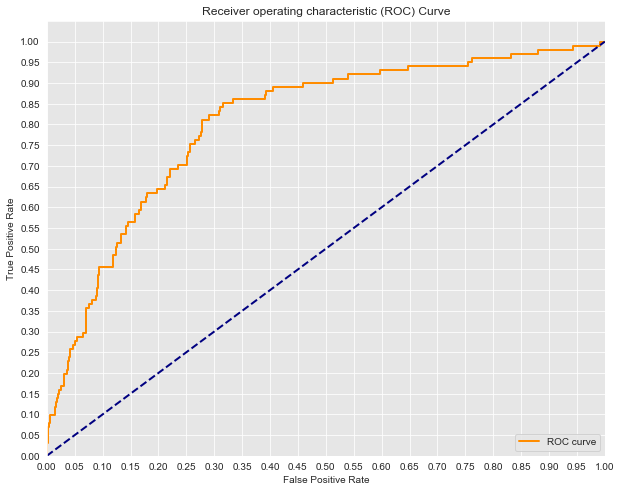

In [31]:
# Initial Model #what does the solver indicate?
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw=lw, label='ROC curve')
plt.plot([0,1], [0,1], color = 'navy', lw=lw, linestyle ='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [32]:
y_pred = logreg.predict(X_test)

# Logistic Regression Evaluation

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[553,  13],
       [ 85,  16]])

In [34]:
recall_score(y_test, y_pred)

0.15841584158415842

### Confustion Matrix Breakdown:
 - 552 false negatives
 - 14 false positives
 - 85 true negatives
 - 16 true positives

# What is worse in terms of customer churn?

False positives would incorrectly predict that the customer is going to leave soon. 
False negatives would incorrectly predict that the customer is not going to leave soon. 
True negatives and true positives are the datapoints that were correctly predicted. 

False negative would be worse than a false positive because it would mean that the reality of a customer cancelling would have been overlooked.

# K-Nearest Neighbors Model

### Due to a high cost of false negatives, recall is a more valuable indicator than precision.

In [35]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)

In [36]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.5853658536585366
Recall Score: 0.2376237623762376
Accuracy Score: 0.8590704647676162
F1 Score: 0.3380281690140845


In [37]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        recall = recall_score(y_test, preds)
        if recall > best_score:
            best_k = k
            best_score = recall
    
    print("Best Value for k: {}".format(best_k))
    print("Recall: {}".format(best_score))

# K-Nearest Neighbors Evaluation

In [38]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 1
Recall: 0.36633663366336633


In [39]:
SEED = 1

In [40]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [41]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.844251828009656

In [42]:
recall_score(y_test, y_pred)

0.7326732673267327

# Decision Tree Model

In [43]:
#check back to classifier opt lab to make sure you are choosing these right

Descision Tree with Default Settings

In [44]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state= SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [45]:
print('Recall: ', recall_score(y_test, y_pred))

Recall:  0.0


# Tuning the Decision Tree Model

Train AUC, and Test AUC will be indicative of training and test error for learning.

### Identifying Ideal Maximum Tree Depth

4 is the ideal maximum tree depth. Greater tree depth is indicative of overfitting as Train AUC soars above Test AUC. 

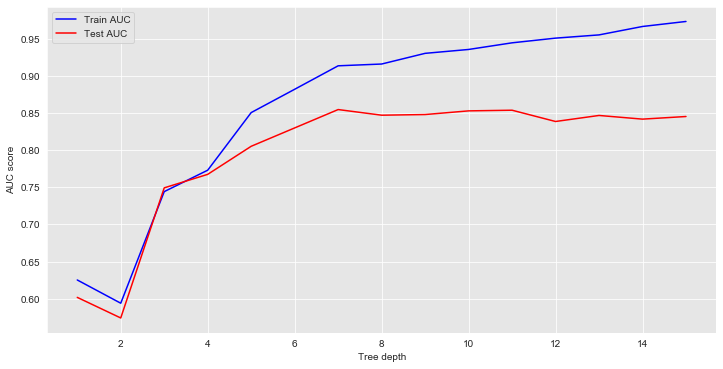

In [46]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 15, 15, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()


### Identifying Ideal Minimum Sample Split

.2 would be the ideal number for sample split. Larger split does not improve learning. 

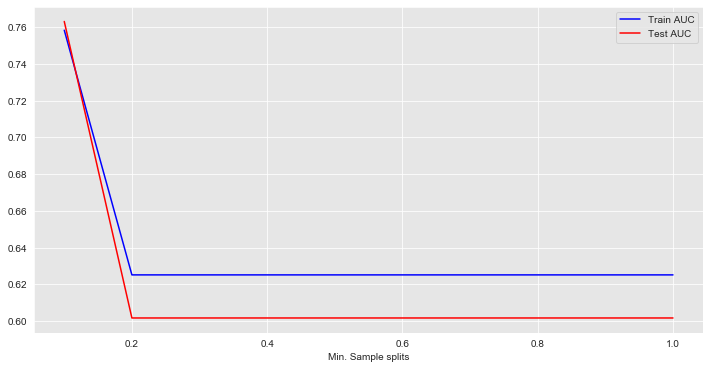

In [47]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

### Identifying Ideal Minimum Sample Leafs

AUC for Training and test are best at .054 where they intersect.

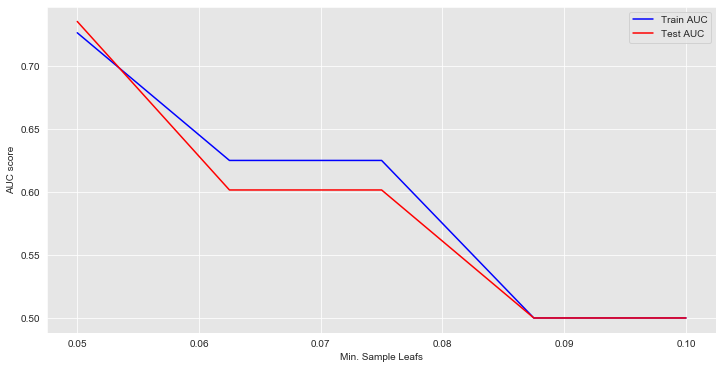

In [48]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.05, .1, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

### Identifying Ideal Maximum Features

Best fit number is 28.

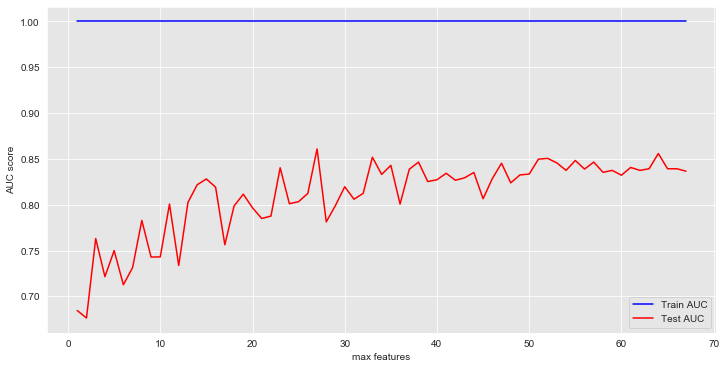

In [49]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

### Retraining the Classifier with Optimal Values

In [50]:
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=28,
                           max_depth=4,
                           min_samples_split=0.2,
                           min_samples_leaf=0.054, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6016775705839136

In [51]:
recall_score(y_test, y_pred) 

0.24752475247524752

In [52]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[541  25]
 [ 76  25]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.91       566
         1.0       0.50      0.25      0.33       101

    accuracy                           0.85       667
   macro avg       0.69      0.60      0.62       667
weighted avg       0.82      0.85      0.83       667



In [53]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 84.86%


In [54]:
dt.feature_importances_

array([0.        , 0.        , 0.123003  , 0.        , 0.        ,
       0.42522029, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06823567,
       0.        , 0.        , 0.38354104, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

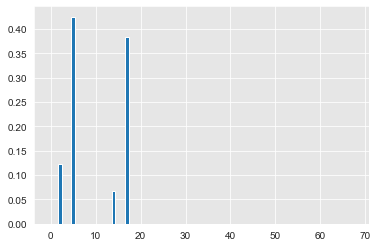

In [55]:
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
plt.show()

# Bagging Trees + Decision Tree Model

In [56]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20, random_state = SEED)

In [57]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=1)

In [58]:
bagged_tree.score(X_train, y_train)


0.9628657164291072

In [59]:
bagged_tree.score(X_test, y_test)

0.9415292353823088

In [60]:
y_pred = bagged_tree.predict(X_test)

### Bagging increased recall.

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558   8]
 [ 31  70]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.90      0.69      0.78       101

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.87       667
weighted avg       0.94      0.94      0.94       667



### Optimizing for Entropy

In [62]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20, random_state = SEED)

In [63]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5),
                  n_estimators=20, random_state=1)

In [64]:
bagged_tree.score(X_train, y_train)


0.9654913728432108

In [65]:
bagged_tree.score(X_test, y_test)

0.9430284857571214

In [66]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for entropy increased precision and f1 score only.

In [67]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[559   7]
 [ 31  70]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.91      0.69      0.79       101

    accuracy                           0.94       667
   macro avg       0.93      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



### Optimizing for Max Depth

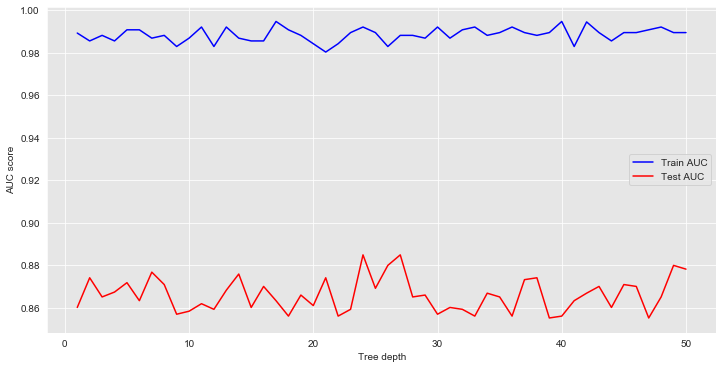

In [68]:
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', random_state = SEED), n_estimators=20)   
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### Optimised at 8.

In [69]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 8), 
                                 n_estimators=20, random_state = SEED)

In [70]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=8),
                  n_estimators=20, random_state=1)

In [71]:
bagged_tree.score(X_train, y_train)


0.978244561140285

In [72]:
bagged_tree.score(X_test, y_test)

0.9505247376311844

In [73]:
y_pred = bagged_tree.predict(X_test)

### Optimizing for max depth increased recall.

In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558   8]
 [ 25  76]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       566
         1.0       0.90      0.75      0.82       101

    accuracy                           0.95       667
   macro avg       0.93      0.87      0.90       667
weighted avg       0.95      0.95      0.95       667



# Gradient Boost Model

In [75]:
gbt_clf = GradientBoostingClassifier(random_state=42)

In [76]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [77]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

### Training Scores

In [78]:
print_metrics(y_train, gbt_clf_train_preds)

Precision Score: 0.9967845659163987
Recall Score: 0.8115183246073299
Accuracy Score: 0.9726181545386346
F1 Score: 0.8946608946608947


### Testing Scores

In [79]:
print_metrics(y_test, gbt_clf_test_preds)

Precision Score: 0.9240506329113924
Recall Score: 0.7227722772277227
Accuracy Score: 0.9490254872563718
F1 Score: 0.8111111111111111


In [80]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       566
         1.0       0.92      0.72      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



# Adaboost Model

In [81]:
adaboost_clf = AdaBoostClassifier(random_state=42)

In [82]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [83]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

### Training Scores

In [84]:
print_metrics(y_train, adaboost_train_preds)

Precision Score: 0.6975806451612904
Recall Score: 0.45287958115183247
Accuracy Score: 0.8934733683420856
F1 Score: 0.5492063492063493


### Testing Scores

In [85]:
print_metrics(y_test, adaboost_test_preds)

Precision Score: 0.6538461538461539
Recall Score: 0.33663366336633666
Accuracy Score: 0.8725637181409296
F1 Score: 0.4444444444444445


# Random Forest Model

In [86]:
forest = RandomForestClassifier(n_estimators=20, max_depth= 8)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [87]:
y_pred = forest.predict(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[566   0]
 [ 57  44]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       566
         1.0       1.00      0.44      0.61       101

    accuracy                           0.91       667
   macro avg       0.95      0.72      0.78       667
weighted avg       0.92      0.91      0.90       667



In [89]:
forest.score(X_train, y_train)

0.9294823705926482

In [90]:
forest.score(X_test, y_test)

0.9145427286356822

# XGBoost Model

In [91]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 97.0%
Validation accuracy: 94.9%
Training Recall: 79.84%
Test Recall: 71.29%


# Tuning XGBoost Model with GridSearchCV

In [92]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [93]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.72%
Validation accuracy: 95.35%
Training Recall: 91.1%
Test Recall: 74.26%


# XGBoost with Optimal Parameters

### The Optimal Parameters Increased

In [94]:
xg = XGBClassifier(max_depth = 6, learning_rate = .1, n_estimators = 100, min_child_weight = 1, subsample = .7, random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 98.72%
Validation accuracy: 95.35%
Training Recall: 91.1%
Test Recall: 74.26%


In [95]:
xg.feature_importances_

array([0.02157279, 0.02331744, 0.07413534, 0.10633046, 0.02852895,
       0.07139576, 0.0241104 , 0.        , 0.04895288, 0.02189251,
       0.        , 0.03095923, 0.0265301 , 0.        , 0.04822513,
       0.07458258, 0.        , 0.09640396, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02868114,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0172247 , 0.        , 0.        ,
       0.03264412, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01371368, 0.02721439, 0.        ,
       0.        , 0.0271558 , 0.        , 0.03740562, 0.        ,
       0.        , 0.        , 0.01813801, 0.        , 0.        ,
       0.        , 0.        , 0.03591694, 0.        , 0.        ,
       0.02803363, 0.        , 0.01927329, 0.01766114, 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

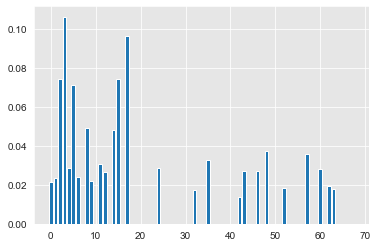

In [96]:
plt.bar(range(len(xg.feature_importances_)), xg.feature_importances_)
plt.show()

### Importance of Features From the XGBoost Model

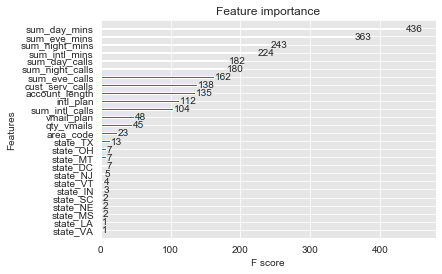

In [97]:
plot_importance(xg)
plt.show()

### The Features with Importance: 
 - sum_day_mins
 - sum_eve_mins
 - intl_plan
 - cust_serv_calls
 - sum_night_mins
 - sum_intl_calls
 - sum_intl_mins
 - sum_night_calls
 - vmail_plan
 - account_length
 - sum_eve_calls
 - qty_vmails
 - sum_day_calls
 - state_ND
 - state_VT
 - state_NJ
 - state_TX
 - state_AL
 - area_code
 - state_HI
 - state_IL
 - state_MT

# Tuning with Only top 12 Important Features

In [98]:
one_hot_df.head()

,account_length,area_code,intl_plan,vmail_plan,qty_vmails,sum_day_mins,sum_day_calls,total_day_charge,sum_eve_mins,sum_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [99]:
im_df = one_hot_df[['sum_day_mins', 'sum_eve_mins', 'intl_plan', 'cust_serv_calls', 'sum_night_mins', 'sum_intl_calls', 'sum_intl_mins', 'sum_night_calls', 'vmail_plan', 'account_length', 'sum_eve_calls', 'qty_vmails', 'sum_day_calls', 'churn']]

In [100]:
im_df.head()

,sum_day_mins,sum_eve_mins,intl_plan,cust_serv_calls,sum_night_mins,sum_intl_calls,sum_intl_mins,sum_night_calls,vmail_plan,account_length,sum_eve_calls,qty_vmails,sum_day_calls,churn
0,265.1,197.4,0,1,244.7,3,10.0,91,1,128,99,25,110,0.0
1,161.6,195.5,0,1,254.4,3,13.7,103,1,107,103,26,123,0.0
2,243.4,121.2,0,0,162.6,5,12.2,104,0,137,110,0,114,0.0
3,299.4,61.9,1,2,196.9,7,6.6,89,0,84,88,0,71,0.0
4,166.7,148.3,1,3,186.9,3,10.1,121,0,75,122,0,113,0.0


In [101]:
X = im_df.drop(columns = 'churn')
y = im_df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost with Top Feature Selection

In [102]:
xg = XGBClassifier(random_state = SEED)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 96.96%
Validation accuracy: 95.05%
Training Recall: 79.58%
Test Recall: 73.27%


# XGBoost with Top Feature Selection and GridSearchCV

In [103]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [104]:
grid_xg = GridSearchCV(xg, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7

Training Accuracy: 98.76%
Validation accuracy: 95.65%
Training Recall: 91.36%
Test Recall: 76.24%


NameError: name 'pyplot' is not defined

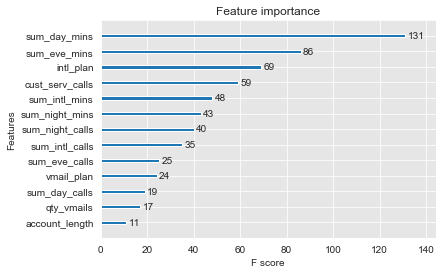

In [105]:
plot_importance(xg)
pyplot.show()

In [ ]:
im_df.head()

### Scatter for sum_day_mins Feature

In [ ]:
plt.scatter(im_df.sum_day_mins, im_df.churn, data = im_df)

### A Subplot Allows for Comparison

In [ ]:

f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':1000})
plt.subplots_adjust
f, axes = plt.subplots(nrows = 3, ncols = 4)
f.tight_layout(pad = 4.3)
plt.figure(figsize = (300,300))

axes[0][0].scatter(im_df.sum_eve_mins, im_df.churn, marker = "o")
axes[0][0].set_xlabel('sum_eve_mins')
axes[0][0].set_ylabel('churn')
axes[0][0].set_title('Total Evening Minutes')

axes[0][1].scatter(im_df.intl_plan, im_df.churn, marker = 'o')
axes[0][1].set_xlabel('intl_plan')
axes[0][1].set_ylabel('churn')
axes[0][1].set_title('International Plan')

axes[0][2].scatter(im_df.cust_serv_calls, im_df.churn,  marker = 'o')
axes[0][2].set_xlabel('cust_serv_calls')
axes[0][2].set_ylabel('churn')
axes[0][2].set_title('Customer Service Calls')

axes[0][3].scatter(im_df.sum_night_mins, im_df.churn,  marker = 'o')
axes[0][3].set_xlabel('sum_night_mins')
axes[0][3].set_ylabel('churn')
axes[0][3].set_title('Total Night Minutes')

axes[1][0].scatter(im_df.sum_intl_calls, im_df.churn, marker = "o")
axes[1][0].set_xlabel('sum_intl_calls')
axes[1][0].set_ylabel('churn')
axes[1][0].set_title('Total International Calls')

axes[1][1].scatter(im_df.sum_intl_mins, im_df.churn, marker = 'o')
axes[1][1].set_xlabel('sum_intl_mins')
axes[1][1].set_ylabel('churn')
axes[1][1].set_title('Total Intl Minutes')

axes[1][2].scatter(im_df.sum_night_calls, im_df.churn,  marker = 'o')
axes[1][2].set_xlabel('sum_night_calls')
axes[1][2].set_ylabel('churn')
axes[1][2].set_title('Total Night Calls')

axes[1][3].scatter(im_df.vmail_plan, im_df.churn,  marker = 'o')
axes[1][3].set_xlabel('vmail_plan')
axes[1][3].set_ylabel('churn')
axes[1][3].set_title('Voicemail Plan')

axes[2][0].scatter(im_df.account_length, im_df.churn, marker = "o")
axes[2][0].set_xlabel('account_length')
axes[2][0].set_ylabel('churn')
axes[2][0].set_title('Account Length')

axes[2][1].scatter(im_df.sum_eve_calls, im_df.churn, marker = 'o')
axes[2][1].set_xlabel('sum_eve_calls')
axes[2][1].set_ylabel('churn')
axes[2][1].set_title('Total Evening Calls')

axes[2][2].scatter(im_df.qty_vmails, im_df.churn,  marker = 'o')
axes[2][2].set_xlabel('qty_vmails')
axes[2][2].set_ylabel('churn')
axes[2][2].set_title('Quantity of Voicemails')

axes[2][3].scatter(im_df.sum_day_calls, im_df.churn,  marker = 'o')
axes[2][3].set_xlabel('sum_day_calls')
axes[2][3].set_ylabel('churn')
axes[2][3].set_title('Total Day Calls')

plt.subplots_adjust(left = .7, bottom = 3, top = 5, hspace = .7)

plt.show()

# Computing Importance with SHAP (SHapley Additive exPlanations) Values

In [ ]:
X_display,y_display = shap.datasets.nhanesi(display=True)

In [ ]:
explainer = shap.TreeExplainer(xg)
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Initiating Javascript

In [ ]:
shap.initjs()

### Features Contributing to Pushing Model Output

The graph below shows features each contributing to push the model output from the base value to the model output. Features pushing the prediction higher are shown in red. Those pushing the prediction lower are in blue. 

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [ ]:
X.shape

In [ ]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

In [ ]:
shap.summary_plot(shap_interaction_values, X)


### Observing Features by SHAP Values

### Contributors of High Customer Churn: Value of One

- High total number of day minutes
- High number of customer service calls
- Customers who have an international plan
- High number of night minutes
- High number of international minutes

### Contributors of Low Customer Churn: Value of Zero

- Customers with a voicemail plan
- Customers with higher number of voicemails
- High number of international calls

In [ ]:
shap.summary_plot(shap_values, X_test)

### Understanding and Investigating Features of Importance

Hypothetically, creating filters for each feature would lead to significant predictability when determining if a customer is at risk for churn. 

Understanding the impact of each feature is important for understanding risk factors of churn.

For instance, all customers with a total number of international mins over 20 have churned. 

In [ ]:
#this seems like what an svm model is.... 
#first we would want to make rules of the ones with the cleanest lines
# then we would move on, hoping that the random dots are gone. 

In [ ]:
# i think actually svm would be good because it is using a parameter. 
# can we ensemble svm for multiple params? 
# but this is not what we would use for improving boost
# what needs to be done for boost?
# we need to get the specifics on the feature importance and what tht means.

### For example, here there are some outliers here so creating a rule about the sum_intl_mins feature will not greatly assist currently. 

In [ ]:
plt.plot(im_df.sum_intl_mins, im_df.churn, 'o', color='black');

In [ ]:
df.head()

In [ ]:
plt.plot(df.total_intl_charge, im_df.churn, 'o', color='black');

In [ ]:
plt.plot(df.monthly_charge, im_df.churn, 'o', color='black');

In [ ]:
plt.plot(df.total_charge, im_df.churn, 'o', color='black');

In [ ]:
plt.plot(im_df.sum_day_mins, im_df.churn, 'o', color='black');

In [ ]:
im_df.sum_day_mins.describe()

In [ ]:
plt.plot(im_df.sum_eve_mins, im_df.churn, 'o', color='black');

# ElasticNet

models to explore:
"
- SVM
- ElasticNet


 what metric is account length
    
is there more competition in other area codes

definitions for columns



# GridSearchCV to tune model params

# let's think through this


What metric are you using for evaluation?
What is your probability threshold? How did you find it?
Why did you choose the model you ended with?
What features are important in the model (depends on the model)?
Do you have a confusion matrix analysis?
Create a train and validation split
Use train data to do train/test splitting 
Feature Engineering
EDA on 3 questions with visualizations
 

Suggested Timeline

Monday - Clean Data and Formulate 3 questions
Tuesday - Answer 3 questions with visualizations
Wednesday - Choose Metric, Model Data and Feature Engineering
Thursday - Finishing Modeling, Write up a confusion matrix analysis, possibly Cost/Benefit
Friday - Finish up README, organize repo, write blog (if possible), share out with cohort

# objective

Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. Note that this is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in losing money on customers who don't stick around very long. Are there any predictable patterns here?

# sort customers by ones who stick around versus ones that don't (binary)

# find patterns with customers that do not stick around

### Key Points
Your deliverables should explicitly address each step of the data science process. Refer to the Data Science Process lesson (Links to an external site.) from Topic 19 for more information about process models you can use.

Your Jupyter Notebook should demonstrate an iterative approach to modeling. This means that you begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. We encourage you to try a bunch of different models: logistic regression, decision trees, or anything else you think would be appropriate.

You must choose appropriate classification metrics and use them to evaluate your models. Choosing the right classification metrics is a key data science skill, and should be informed by data exploration and the business problem itself. You must then use this metric to evaluate your model performance using both training and testing data.

# Conclusion